# Автокорреляция

## Ссылки

[Practical Guide to Autocorrelation](https://www.scicoding.com/practical-guide-to-autocorrelation/)

[4 Techniques for Autocorrelation Function Calculation](https://www.scicoding.com/4-ways-of-calculating-autocorrelation-in-python/)

## Определение

**Автокорреляция** - это функция, обеспечивающая корреляцию набора данных с самим собой по разным задержкам (лагам).

В контексте временных рядов автокорреляцию можно рассматривать как корреляцию между рядом и его запаздывающими значениями. Например, при ежедневной доходности фондового рынка автокорреляция может использоваться для измерения того, как сегодняшняя доходность связана со вчерашней доходностью.

Степень корреляции определяется коэффициентами корреляции

- Коэффициент корреляции, близкий к 1, указывает на сильную положительную автокорреляцию. То есть за высоким значением во временном ряду, скорее всего, последует другое высокое значение, а за низким значением, вероятно, последует еще одно низкое значение.
- Коэффициент корреляции, близкий к -1, указывает на сильную отрицательную автокорреляцию. То есть за высоким значением во временном ряду, скорее всего, последует низкое значение, и наоборот.
- Коэффициент корреляции ближе к 0 указывает на отсутствие корреляции. То есть значения во временном ряду кажутся случайными и не подчиняются заметной закономерности.

## Способы расчета автокорреляции

In [2]:
# our dataset
data = [3, 16, 156, 47, 246, 176, 233, 140, 130, 
        101, 166, 201, 200, 116, 118, 247, 
        209, 52, 153, 232, 128, 27, 192, 168, 208, 
        187, 228, 86, 30, 151, 18, 254, 
        76, 112, 67, 244, 179, 150, 89, 49, 83, 147, 90, 
        33, 6, 158, 80, 35, 186, 127]

In [3]:
# lag
lags = range(10)

### Only Python

In [4]:
# Pre-allocate autocorrelation table
acorr = len(lags) * [0]
acorr

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [5]:
# Mean
mean = sum(data) / len(data)
mean

130.6

In [6]:
# Variance
var = sum([(x - mean)**2 for x in data]) / len(data)
var

5260.76

In [7]:
# Normalized data
ndata = [x - mean for x in data]
ndata

[-127.6,
 -114.6,
 25.400000000000006,
 -83.6,
 115.4,
 45.400000000000006,
 102.4,
 9.400000000000006,
 -0.5999999999999943,
 -29.599999999999994,
 35.400000000000006,
 70.4,
 69.4,
 -14.599999999999994,
 -12.599999999999994,
 116.4,
 78.4,
 -78.6,
 22.400000000000006,
 101.4,
 -2.5999999999999943,
 -103.6,
 61.400000000000006,
 37.400000000000006,
 77.4,
 56.400000000000006,
 97.4,
 -44.599999999999994,
 -100.6,
 20.400000000000006,
 -112.6,
 123.4,
 -54.599999999999994,
 -18.599999999999994,
 -63.599999999999994,
 113.4,
 48.400000000000006,
 19.400000000000006,
 -41.599999999999994,
 -81.6,
 -47.599999999999994,
 16.400000000000006,
 -40.599999999999994,
 -97.6,
 -124.6,
 27.400000000000006,
 -50.599999999999994,
 -95.6,
 55.400000000000006,
 -3.5999999999999943]

In [19]:
# Go though lag components one-by-one
for l in lags:
    c = 1 # Self correlation
    if (l > 0):
        tmp = [ndata[l:][i] * ndata[:-l][i]
              for i in range(len(data) - l)]
        c = sum(tmp) / len(data) / var

    acorr[l] = c

In [20]:
acorr

[1,
 0.07326561181274188,
 0.013414335571286287,
 -0.03866087789596939,
 0.1306486515256351,
 -0.0590728335829804,
 -0.004491974543602046,
 0.08829020901922917,
 -0.05690310905648613,
 0.03172606239402672]

### Library statsmodels

In [21]:
import statsmodels.api as sm

In [57]:
acorr = sm.tsa.acf(data, nlags = len(lags)-1)

In [58]:
acorr

array([ 1.        ,  0.07326561,  0.01341434, -0.03866088,  0.13064865,
       -0.05907283, -0.00449197,  0.08829021, -0.05690311,  0.03172606])

### Numpy.correlate

In [34]:
import numpy as np

In [78]:
# our dataset
data = [3, 16, 156, 47, 246, 176, 233, 140, 130, 
        101, 166, 201, 200, 116, 118, 247, 
        209, 52, 153, 232, 128, 27, 192, 168, 208, 
        187, 228, 86, 30, 151, 18, 254, 
        76, 112, 67, 244, 179, 150, 89, 49, 83, 147, 90, 
        33, 6, 158, 80, 35, 186, 127]

In [79]:
x = np.array(data)
x

array([  3,  16, 156,  47, 246, 176, 233, 140, 130, 101, 166, 201, 200,
       116, 118, 247, 209,  52, 153, 232, 128,  27, 192, 168, 208, 187,
       228,  86,  30, 151,  18, 254,  76, 112,  67, 244, 179, 150,  89,
        49,  83, 147,  90,  33,   6, 158,  80,  35, 186, 127])

In [80]:
mean = np.mean(x)
mean

130.6

In [81]:
var = np.var(x)
var

5260.76

In [82]:
ndata = x - mean
ndata

array([-127.6, -114.6,   25.4,  -83.6,  115.4,   45.4,  102.4,    9.4,
         -0.6,  -29.6,   35.4,   70.4,   69.4,  -14.6,  -12.6,  116.4,
         78.4,  -78.6,   22.4,  101.4,   -2.6, -103.6,   61.4,   37.4,
         77.4,   56.4,   97.4,  -44.6, -100.6,   20.4, -112.6,  123.4,
        -54.6,  -18.6,  -63.6,  113.4,   48.4,   19.4,  -41.6,  -81.6,
        -47.6,   16.4,  -40.6,  -97.6, -124.6,   27.4,  -50.6,  -95.6,
         55.4,   -3.6])

In [83]:
acorr = np.correlate(ndata, ndata, 'full')[len(ndata)-1:]
acorr

array([263038.  ,  19271.64,   3528.48, -10169.28,  34365.56, -15538.4 ,
        -1181.56,  23223.68, -14967.68,   8345.16,  18815.2 ,  13324.84,
         3762.48,  19564.12,  -3199.24, -36404.4 ,   1015.64,   6712.88,
       -30743.68,   -460.84,  17260.8 ,  -6738.16, -23424.32, -28631.88,
       -51712.64,  -4209.  ,  -6383.36,  14679.88, -60002.68,  18081.16,
        13041.2 , -11704.16, -24234.32,   -980.88, -21299.64, -32569.6 ,
       -17817.76,  -5170.12,  -4970.48,   3378.16,  -7819.2 ,   2095.84,
         6369.68,  22773.32,  25695.56,  -5172.6 ,  19120.44,   5758.28,
        -6656.48,    459.36])

In [84]:
acorr = acorr / var / len(ndata)

In [85]:
acorr

array([ 1.        ,  0.07326561,  0.01341434, -0.03866088,  0.13064865,
       -0.05907283, -0.00449197,  0.08829021, -0.05690311,  0.03172606,
        0.07153035,  0.05065747,  0.01430394,  0.07437754, -0.01216265,
       -0.13839977,  0.00386119,  0.02552057, -0.11687923, -0.00175199,
        0.06562094, -0.02561668, -0.08905299, -0.10885074, -0.1965976 ,
       -0.01600149, -0.02426782,  0.05580897, -0.22811411,  0.06873973,
        0.04957915, -0.04449608, -0.09213239, -0.00372904, -0.08097552,
       -0.12382089, -0.06773835, -0.01965541, -0.01889643,  0.01284286,
       -0.0297265 ,  0.00796782,  0.02421582,  0.08657806,  0.09768763,
       -0.01966484,  0.07269079,  0.02189144, -0.02530615,  0.00174636])

### Преобразование Фурье

In [65]:
import numpy as np

In [93]:
# our dataset
data = [3, 16, 156, 47, 246, 176, 233, 140, 130, 
        101, 166, 201, 200, 116, 118, 247, 
        209, 52, 153, 232, 128, 27, 192, 168, 208, 
        187, 228, 86, 30, 151, 18, 254, 
        76, 112, 67, 244, 179, 150, 89, 49, 83, 147, 90, 
        33, 6, 158, 80, 35, 186, 127]
data = np.array(data)

In [94]:
# Nearest size with power of 2
size = 2**np.ceil(np.log2(2*len(data) - 1)).astype('int')

In [95]:
# Variance
var = np.var(data)

In [96]:
# Normalized data
ndata = data - np.mean(data)

In [97]:
# Compute the FFT
fft = np.fft.fft(ndata, size)

In [98]:
# Get the power spectrum
pwr = np.abs(fft)**2

In [99]:
acorr = np.fft.ifft(pwr).real / var / len(data)
acorr

array([ 1.00000000e+00,  7.32656118e-02,  1.34143356e-02, -3.86608779e-02,
        1.30648652e-01, -5.90728336e-02, -4.49197454e-03,  8.82902090e-02,
       -5.69031091e-02,  3.17260624e-02,  7.15303492e-02,  5.06574715e-02,
        1.43039409e-02,  7.43775424e-02, -1.21626533e-02, -1.38399775e-01,
        3.86119116e-03,  2.55205712e-02, -1.16879234e-01, -1.75199021e-03,
        6.56209369e-02, -2.56166790e-02, -8.90529885e-02, -1.08850736e-01,
       -1.96597602e-01, -1.60014903e-02, -2.42678244e-02,  5.58089706e-02,
       -2.28114113e-01,  6.87397258e-02,  4.95791483e-02, -4.44960804e-02,
       -9.21323915e-02, -3.72904295e-03, -8.09755244e-02, -1.23820893e-01,
       -6.77383496e-02, -1.96554110e-02, -1.88964332e-02,  1.28428592e-02,
       -2.97265034e-02,  7.96782214e-03,  2.42158167e-02,  8.65780610e-02,
        9.76876345e-02, -1.96648393e-02,  7.26907899e-02,  2.18914377e-02,
       -2.53061535e-02,  1.74636364e-03, -1.38306207e-17,  0.00000000e+00,
       -1.72882759e-18,  

## Autocorrelation plot (correlogram)

### statsmodels.graphics.tsaplots.plot_acf

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

In [101]:
series = pd.read_csv("Series/daily-total-female-births-in-cal.csv")
series.head()

,Date,Count
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


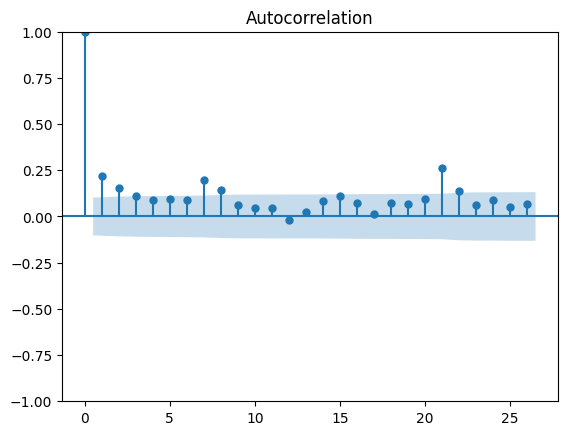

In [106]:
plot_acf(series['Count'])
plt.show()

### statsmodels.tsa.api.graphics.plot_acf

In [111]:
import statsmodels.tsa.api as smt

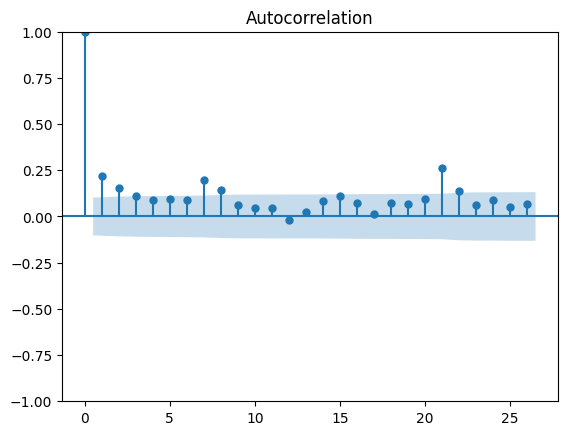

In [113]:
smt.graphics.plot_acf(series['Count'], lags=None)
plt.show()

## Partial Autocorrelation

[Частичная автокорреляционная функция](https://en.wikipedia.org/wiki/Partial_autocorrelation_function)



## Partial Autocorrelation Plot

### statsmodels.graphics.tsaplots.plot_pacf

In [107]:
from statsmodels.graphics.tsaplots import plot_pacf

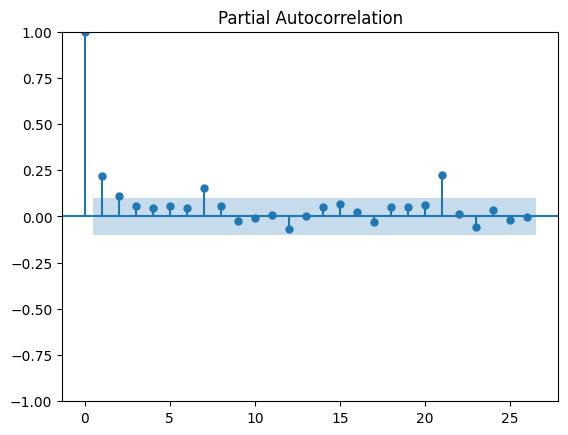

In [109]:
plot_pacf(series['Count'], lags=None)
plt.show()

### statsmodels.tsa.api.graphics.plot_pacf

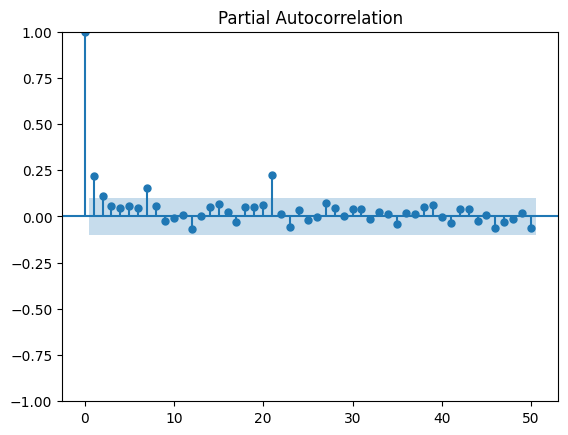

In [115]:
smt.graphics.plot_pacf(series['Count'], lags=50)
plt.show()